## Explore employees' contact reasons with major departments

Among those employees who have at least ont contact with major departments, we would like to know the **relative frequency** of reasons of those contacts. 

In [1]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('contact_reasons.csv')
df.head()

,satisfaction_score,rating_acct,rating_HR,rating_OM,rating_security,rating_D&R,reasons_approched_accounting_1,reasons_approched_accounting_2,reasons_approched_accounting_3,reasons_approched_accounting_4,...,reasons_approched_HR_4,reasons_approched_HR_5,reasons_approched_HR_6,reasons_approched_Office Management_1,reasons_approched_Office Management_2,reasons_approched_Office Management_3,reasons_approched_Office Management_4,reasons_approched_Office Management_5,reasons_approched_Office Management_6,reasons_approched_Office Management_7
0,8.0,3.0,6.0,1.0,4.0,NaN,3.0,4.0,5.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,NaN,7.0,10.0,9.0,8.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,2.0,3.0,5.0,7.0,NaN,NaN
2,8.0,8.0,NaN,10.0,8.0,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN
3,7.0,9.0,7.0,9.0,NaN,NaN,5.0,1.0,2.0,3.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,9.0,8.0,8.0,9.0,NaN,4.0,1.0,2.0,3.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


### Relative Frequency

1. Reshape dataframe to calculate the count for each reasons
2. Get the relative frequency for each reason for each department
3. Visualize

#### 1. Reshape dataframe to calculate the count for each reasons

In [3]:
# Each column represent one reason of contact and each row represent one employee. 
# Most of the employee has multiple reasons. We will need find unique count for each reason and sum the count.
combined = pd.Series()
for col in list(df.columns):
    a = df[col].value_counts()
    combined = pd.concat([combined,a],axis=1)
combined = combined.drop(0,axis=1)

In [4]:
# After combining all the unique count of each column, 
# the index now represents each unique reason. e.g. Reason 1, Reason 2...and later on will be replaced by words.
combined.head()

,satisfaction_score,rating_acct,rating_HR,rating_OM,rating_security,rating_D&R,reasons_approched_accounting_1,reasons_approched_accounting_2,reasons_approched_accounting_3,reasons_approched_accounting_4,...,reasons_approched_HR_4,reasons_approched_HR_5,reasons_approched_HR_6,reasons_approched_Office Management_1,reasons_approched_Office Management_2,reasons_approched_Office Management_3,reasons_approched_Office Management_4,reasons_approched_Office Management_5,reasons_approched_Office Management_6,reasons_approched_Office Management_7
0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,1.0,1.0,1.0,NaN,3.0,6.0,115.0,1.0,NaN,...,2.0,NaN,1.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,1.0,8.0,16.0,29.0,NaN,...,1.0,NaN,1.0,17.0,75.0,NaN,NaN,NaN,NaN,NaN
3.0,8.0,5.0,6.0,1.0,1.0,1.0,27.0,14.0,31.0,15.0,...,NaN,1.0,NaN,6.0,20.0,35.0,NaN,NaN,NaN,NaN
4.0,4.0,8.0,5.0,NaN,2.0,2.0,82.0,17.0,39.0,27.0,...,1.0,NaN,NaN,3.0,10.0,15.0,15.0,NaN,NaN,NaN


In [5]:
# For each department, sum the count of reasons for employees to visit 
depts = ['accounting','HR','Office']

reasons = pd.DataFrame()
for dept in depts:
    reason = combined.filter(like=dept).sum(axis=1).to_frame().rename({0:dept},axis=1)
    reasons = pd.concat([reasons,reason],axis=1)

reasons

,accounting,HR,Office
0.0,0.0,1.0,0.0
1.0,122.0,18.0,123.0
2.0,53.0,52.0,92.0
3.0,87.0,128.0,61.0
4.0,176.0,83.0,43.0
5.0,89.0,33.0,87.0
6.0,16.0,41.0,16.0
7.0,35.0,32.0,105.0
8.0,0.0,85.0,7.0
9.0,0.0,64.0,0.0


#### 2. Get the relative frequency for each reason for each department

- Convert indexes to actual reasons of contact for each department and compute percentage for each reason 

In [6]:
# Account department
reasons_a = {1.0:'Salary',
             2.0:'Expenditure of Per diem',
             3.0:'Reimbursement for travel expenses',
             4.0:'Reimbursement for company vehicle',
             5.0:'Pension',
             6.0:'Suppliers',
             7.0:'Other'}
acct_reasons = pd.DataFrame(reasons[['accounting']]/reasons['accounting'].sum()).drop([8.0,9.0]).reset_index()
acct_reasons.replace({'index':reasons_a},inplace=True)
acct_reasons.rename({'index':'Reason','accounting':'Percentage of contacts per reason'},axis=1,inplace=True)
acct_reasons

,Reason,Percentage of contacts per reason
0,0,0.000000
1,Salary,0.211073
2,Expenditure of Per diem,0.091696
3,Reimbursement for travel expenses,0.150519
4,Reimbursement for company vehicle,0.304498
5,Pension,0.153979
6,Suppliers,0.027682
7,Other,0.060554
8,10,0.000000


In [7]:
# HR
reasons_hr = {1.0:'Onboarding',
              2.0:'Promotion and Salary raise',
              3.0:'Attendance reports',
              4.0:'Sick days  and vacation days',
              5.0:'Personal circumstances',
              6.0:'Calculate of seniority',
              7.0:'Retirement and pension funds',
              8.0:'Open position',
              9.0:'Other'}
HR_reasons = pd.DataFrame(reasons[['HR']]/reasons['accounting'].sum()).reset_index()
HR_reasons.replace({'index':reasons_hr},inplace=True)
HR_reasons.rename({'index':'Reason','HR':'Percentage of contacts per reason'},axis=1,inplace=True)
HR_reasons

,Reason,Percentage of contacts per reason
0,0,0.001730
1,Onboarding,0.031142
2,Promotion and Salary raise,0.089965
3,Attendance reports,0.221453
4,Sick days and vacation days,0.143599
5,Personal circumstances,0.057093
6,Calculate of seniority,0.070934
7,Retirement and pension funds,0.055363
8,Open position,0.147059
9,Other,0.110727


In [8]:
# Office Management
reasons_om = {1.0:'Office equipment',
              2.0:'Mail',
              3.0:'Catering',
              4.0:'Company vehicle',
              5.0:'Hardware',
              6.0:'Insurance',
              7.0:'Office Maintenance',
              8.0:'Other'}
OM_reasons = pd.DataFrame(reasons[['Office']]/reasons['accounting'].sum()).drop(9.0).reset_index()
OM_reasons.replace({'index':reasons_om},inplace=True)
OM_reasons.rename({'index':'Reason','Office':'Percentage of contacts per reason'},axis=1,inplace=True)
OM_reasons

,Reason,Percentage of contacts per reason
0,0,0.000000
1,Office equipment,0.212803
2,Mail,0.159170
3,Catering,0.105536
4,Company vehicle,0.074394
5,Hardware,0.150519
6,Insurance,0.027682
7,Office Maintenance,0.181661
8,Other,0.012111
9,10,0.000000


#### 3. Visualization  

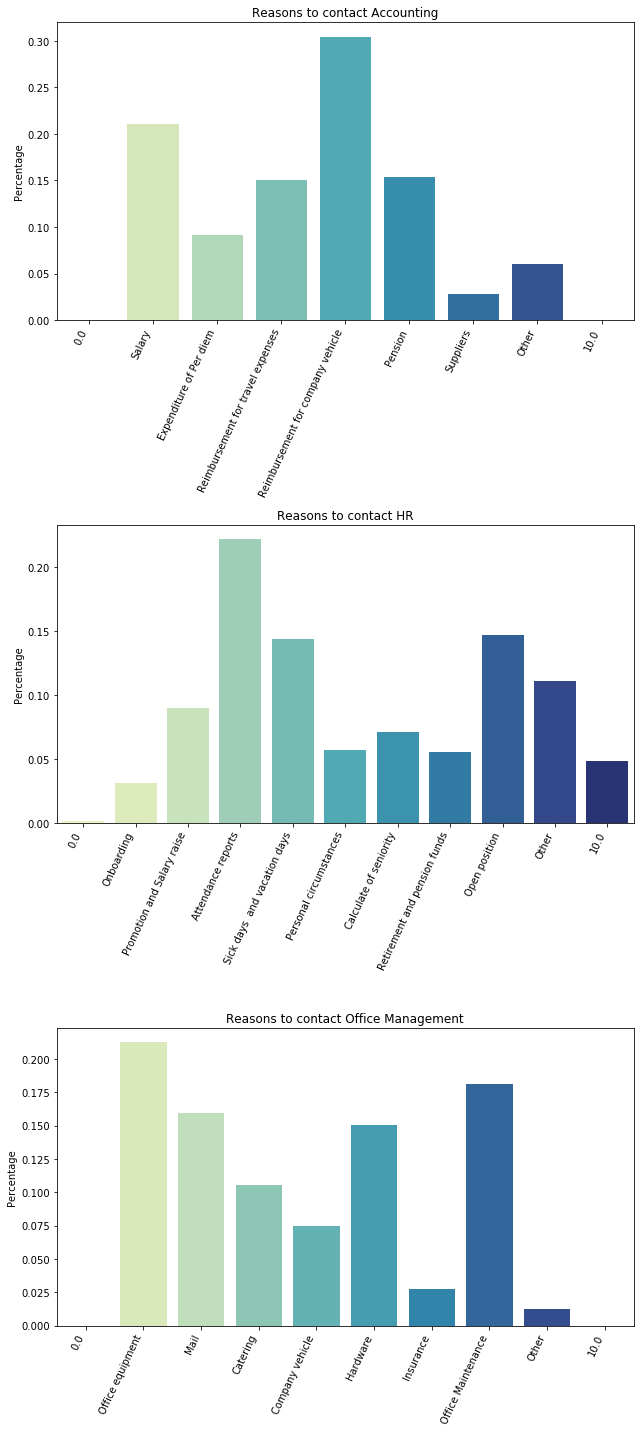

In [9]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(9,20))

acct = sns.barplot(data=acct_reasons,x='Reason',y='Percentage of contacts per reason',palette=("YlGnBu"),ax=ax[0])
acct.set_xticklabels(acct.get_xticklabels(),rotation=65, horizontalalignment='right')
acct.set(xlabel='',ylabel='Percentage')
acct.set_title('Reasons to contact Accounting')

hr = sns.barplot(data=HR_reasons,x='Reason',y='Percentage of contacts per reason',palette=("YlGnBu"),ax=ax[1]);
hr.set_xticklabels(hr.get_xticklabels(),rotation=65, horizontalalignment='right')
hr.set(xlabel='',ylabel='Percentage')
hr.set_title('Reasons to contact HR')

om = sns.barplot(data=OM_reasons,x='Reason',y='Percentage of contacts per reason',palette=("YlGnBu"),ax=ax[2]);       
om.set_xticklabels(om.get_xticklabels(),rotation=65, horizontalalignment='right')
om.set(xlabel='',ylabel='Percentage')
om.set_title('Reasons to contact Office Management')

plt.tight_layout()


